In [1]:
print('hello world')

hello world


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('monthly expense.csv')

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('monthly expense.csv')

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert to DataFrame and describe
print(pd.DataFrame(data_scaled, columns=data.columns).describe())

# Optional: show first few original rows
print(data.head())




            Channel        Region         Fresh        Milk       Grocery  \
count  4.400000e+02  4.400000e+02  4.400000e+02  440.000000  4.400000e+02   
mean   1.614870e-17  3.552714e-16 -3.431598e-17    0.000000 -4.037175e-17   
std    1.001138e+00  1.001138e+00  1.001138e+00    1.001138  1.001138e+00   
min   -6.902971e-01 -1.995342e+00 -9.496831e-01   -0.778795 -8.373344e-01   
25%   -6.902971e-01 -7.023369e-01 -7.023339e-01   -0.578306 -6.108364e-01   
50%   -6.902971e-01  5.906683e-01 -2.767602e-01   -0.294258 -3.366684e-01   
75%    1.448652e+00  5.906683e-01  3.905226e-01    0.189092  2.849105e-01   
max    1.448652e+00  5.906683e-01  7.927738e+00    9.183650  8.936528e+00   

             Frozen  Detergents_Paper    Delicassen  
count  4.400000e+02      4.400000e+02  4.400000e+02  
mean   3.633457e-17      2.422305e-17 -8.074349e-18  
std    1.001138e+00      1.001138e+00  1.001138e+00  
min   -6.283430e-01     -6.044165e-01 -5.402644e-01  
25%   -4.804306e-01     -5.511349e-0

In [ ]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(
 |      n_clusters=8,
 |      *,
 |      init='k-means++',
 |      n_init='auto',
 |      max_iter=300,
 |      tol=0.0001,
 |      verbose=0,
 |      random_state=None,
 |      copy_x=True,
 |      algorithm='lloyd'
 |  )
 |
 |  K-Means clustering.
 |
 |  Read more in the :ref:`User Guide <k_means>`.
 |
 |  Parameters
 |  ----------
 |
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |
 |      For an example of how to choose an optimal value for `n_clusters` refer to
 |      :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
 |
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empiric

In [ ]:
kmeans = KMeans(n_clusters = 2 , init = 'k-means++')

kmeans.fit(data_scaled)


kmeans.inertia_

3166.594897063428

In [8]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# wcss = []

# for clusters in range(1 , 21):
#     kmeans = KMeans(n_clusters = 1 , init='k-means++')
#     kmeans.fit(data_scaled)
#     wcss.append(kmeans.inertia_)

#     plt.figure(figsize=(6,3))
#     plt.plot(range(1, 21), wcss, marker = 'O')
#     plt.title('the flow cruve')
#     plt.xlabel('clusters')
#     plt.ylabel('inertia')
#     plt.show()

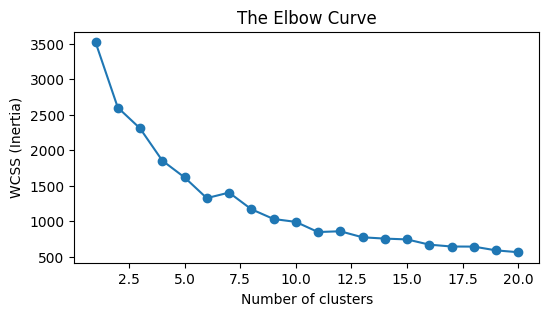

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Loop from 1 to 20 (inclusive)
for clusters in range(1, 21):
    kmeans = KMeans(n_clusters=clusters, init='k-means++')
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(6, 3))
plt.plot(range(1, 21), wcss, marker='o')
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming your data is already loaded as "data"
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=6, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

# Correct DataFrame creation
df = pd.DataFrame(data_scaled)
print(df)
print(df.head())


            0         1         2         3         4         5         6  \
0    1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367 -0.043569   
1    1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136  0.086407   
2    1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536  0.133232   
3   -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144 -0.498588   
4    1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859 -0.231918   
..        ...       ...       ...       ...       ...       ...       ...   
435 -0.690297  0.590668  1.401312  0.848446  0.850760  2.075222 -0.566831   
436 -0.690297  0.590668  2.155293 -0.592142 -0.757165  0.296561 -0.585519   
437  1.448652  0.590668  0.200326  1.314671  2.348386 -0.543380  2.511218   
438 -0.690297  0.590668 -0.135384 -0.517536 -0.602514 -0.419441 -0.569770   
439 -0.690297  0.590668 -0.729307 -0.555924 -0.573227 -0.620094 -0.504888   

            7  
0   -0.066339  
1    0.089151  
2    2.243293  
3    0.0934

In [14]:
# Assign cluster labels to dataframe
df['cluster'] = pred

# Show count of each cluster
print(df['cluster'].value_counts())


cluster
1    166
0    124
2     85
4     48
3     10
5      7
Name: count, dtype: int64


In [ ]:
# import numpy as np

# def get_cluster_prediction():
#     channel = int(input("Enter channel (e.g.,1,2): "))
#     region = int(input("Enter region (e.g.,1,2,3): "))
#     fresh = int(input("Enter annual spending on fresh products: "))
#     milk = int(input("Enter annual spending on milk: "))
#     grocery = float(input("Enter annual spending on grocery: "))
#     frozen = float(input("Enter annual spending on frozen products: "))
#     detergents_paper = float(input("Enter annual spending on detergents_paper: "))
#     delicassen = float(input("Enter annual spending on delicassen: "))

#     # Create array
#     user_data = np.array([[channel, region, fresh, milk, grocery, frozen, detergents_paper, delicassen]])

#     # Scale data
#     user_data_scaled = scaler.transform(user_data)

#     # Predict
#     clusters = kmeans.predict(user_data_scaled)
#     print(f"\nThe customer belongs to cluster: {clusters[0]}")

# # Call the function
# get_cluster_prediction()


In [3]:
import streamlit as st
import numpy as np

st.title("Customer Cluster Prediction")

channel = st.number_input("Channel", min_value=1, max_value=2)
region = st.number_input("Region", min_value=1, max_value=3)
fresh = st.number_input("Fresh spending")
milk = st.number_input("Milk spending")
grocery = st.number_input("Grocery spending")
frozen = st.number_input("Frozen spending")
detergents_paper = st.number_input("Detergent & paper spending")
delicassen = st.number_input("Delicassen spending")

if st.button("Predict Cluster"):
    user_data = np.array([[channel, region, fresh, milk, grocery, frozen, detergents_paper, delicassen]])
    user_data_scaled = scaler.transform(user_data)
    clusters = kmeans.predict(user_data_scaled)
    st.success(f"Customer belongs to cluster: {clusters[0]}")


2025-11-23 16:01:52.323 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 16:02:05.251 
  command:

    streamlit run C:\Users\somesh pancholi\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-11-23 16:02:05.260 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 16:02:05.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 16:02:05.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 16:02:05.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 16:02:05.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 16:02:0

In [4]:
# import requests

# response = requests.get("https://api.coindesk.com/v1/bpi/currentprice.json")
# data = response.json()

# print("Bitcoin Price in USD:", data["bpi"]["USD"]["rate"])


In [2]:
!pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.2 MB 1.7 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/10.2 MB 1.6 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/10.2 MB 1.4 MB/s eta 0:00:07
   ----- ---------------------------------- 1.3/10.2 MB 1.5 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/10.2 MB 1.5 MB/s eta 0:00:06
   --------- ------------------------------ 2.4/10.2 MB 1.7 MB/s eta 0:00:05
   ------------ --------------------------- 3.1/10.2 MB 1.9 MB/s eta 0:00:04
   --------------- ------------------------ 3.9/10.2 MB 2.1 MB/s eta 0:00:04
   ----------------- ---------------------- 4.5/10.2 MB 2.1 MB/s eta 0:00:03
   ------------------- -------------------- 5.0/10.2 MB 2.2 MB/s eta 0:00:03
   ---------